# Logistic Regression with scikit-learn

This is an example of logistic regression in Python with the [scikit-learn module](http://scikit-learn.org/), performed for an [assignment](https://github.com/ajschumacher/gadsdc/tree/master/logistic_assignment) with my [General Assembly Data Science class](https://generalassemb.ly/education/data-science).

## Dataset

The dataset I chose is the [affairs dataset](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) that comes with [Statsmodels](http://statsmodels.sourceforge.net/). It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a [1978 paper](http://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf) from the Journal of Political Economy.

## Description of Variables

The dataset contains 6366 observations of 9 variables:

* `rate_marriage`: woman's rating of her marriage (1 = very poor, 5 = very good)
* `age`: woman's age
* `yrs_married`: number of years married
* `children`: number of children
* `religious`: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
* `educ`: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
* `occupation`: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
* `occupation_husb`: husband's occupation (same coding as above)
* `affairs`: time spent in extra-marital affairs

## Problem Statement

I decided to treat this as a classification problem by creating a new binary variable `affair` (did the woman have at least one affair?) and trying to predict the classification for each woman.

Skipper Seabold, one of the primary contributors to Statsmodels, did a similar classification in his [Statsmodels demo](https://github.com/jseabold/pydc) at a [Statistical Programming DC Meetup](http://www.meetup.com/stats-prog-dc/events/173693192/). However, he used Statsmodels for the classification (whereas I'm using scikit-learn), and he treated the occupation variables as continuous (whereas I'm treating them as categorical).

## Import modules

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

## Data Pre-Processing

First, let's load the dataset and add a binary `affair` column.

In [21]:
# load dataset
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

In [22]:
dta.shape

(6366, 10)

In [23]:
dta.head()

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb   affairs  affair  
0              5.0  0.111111       1  
1              4.0  3.230769       1  
2              5.0  1.400000       1  
3              5.0  0.727273       1  
4              4.0  4.666666       1

In [25]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
affair             6366 non-null int64
dtypes: float64(9), int64(1)
memory usage: 497.4 KB


In [26]:
dta.describe()

rate_marriage          age  yrs_married     children    religious  \
count    6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean        4.109645    29.082862     9.009425     1.396874     2.426170   
std         0.961430     6.847882     7.280120     1.433471     0.878369   
min         1.000000    17.500000     0.500000     0.000000     1.000000   
25%         4.000000    22.000000     2.500000     0.000000     2.000000   
50%         4.000000    27.000000     6.000000     1.000000     2.000000   
75%         5.000000    32.000000    16.500000     2.000000     3.000000   
max         5.000000    42.000000    23.000000     5.500000     4.000000   

              educ   occupation  occupation_husb      affairs       affair  
count  6366.000000  6366.000000      6366.000000  6366.000000  6366.000000  
mean     14.209865     3.424128         3.850141     0.705374     0.322495  
std       2.178003     0.942399         1.346435     2.203374     0.467468  
min       9.000000     1.000000         1.000000     0.000000     0.000000  
25%      12.000000     3.000000         3.000000     0.000000     0.000000  
50%      14.000000     3.000000         4.000000     0.000000     0.000000  
75%      16.000000     4.000000         5.000000     0.484848     1.000000  
max      20.000000     6.000000         6.000000    57.599991     1.000000

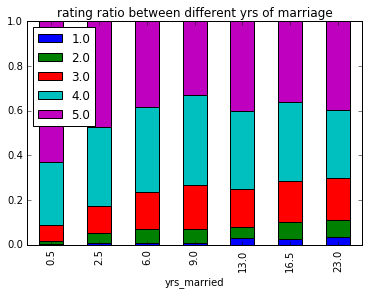

In [70]:
yrs = pd.crosstab(dta.yrs_married, dta.rate_marriage)
yrs.div(yrs.sum(1), axis=0).plot(kind='bar', stacked=True, title="rating ratio between different yrs of \
marriage")
plt.legend(loc = "best")

## Data Exploration

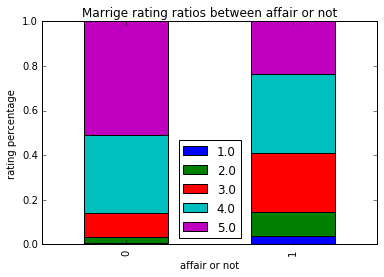

In [39]:
rating = pd.crosstab(dta.affair, dta.rate_marriage)
rating.div(rating.sum(1), axis=0).plot(kind = "bar", stacked = True, title = "Marrige rating ratios between affair or not")
plt.xlabel("affair or not")
plt.ylabel("rating percentage")
plt.legend(loc = "best")

In [40]:
dta.groupby('affair').mean()

rate_marriage        age  yrs_married  children  religious       educ  \
affair                                                                          
0            4.329701  28.390679     7.989335  1.238813   2.504521  14.322977   
1            3.647345  30.537019    11.152460  1.728933   2.261568  13.972236   

        occupation  occupation_husb   affairs  
affair                                         
0         3.405286         3.833758  0.000000  
1         3.463712         3.884559  2.187243

We can see that on average, women who have affairs rate their marriages lower, which is to be expected. Let's take another look at the `rate_marriage` variable.

In [4]:
dta.groupby('rate_marriage').mean()

age  yrs_married  children  religious       educ  \
rate_marriage                                                           
1.0            33.823232    13.914141  2.308081   2.343434  13.848485   
2.0            30.471264    10.727011  1.735632   2.330460  13.864943   
3.0            30.008056    10.239174  1.638469   2.308157  14.001007   
4.0            28.856601     8.816905  1.369536   2.400981  14.144514   
5.0            28.574702     8.311662  1.252794   2.506334  14.399776   

               occupation  occupation_husb   affairs    affair  
rate_marriage                                                   
1.0              3.232323         3.838384  1.201671  0.747475  
2.0              3.327586         3.764368  1.615745  0.635057  
3.0              3.402820         3.798590  1.371281  0.550856  
4.0              3.420161         3.835861  0.674837  0.322926  
5.0              3.454918         3.892697  0.348174  0.181446

An increase in `age`, `yrs_married`, and `children` appears to correlate with a declining marriage rating.

## Data Visualization

In [5]:
# show plots in the notebook
%matplotlib inline

Let's start with histograms of education and marriage rating.

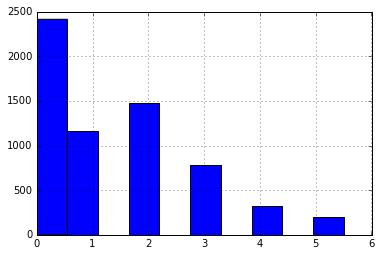

In [46]:
dta.children.hist()

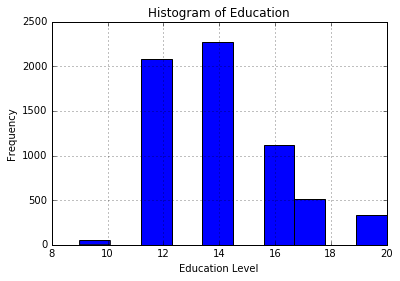

In [6]:
# histogram of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

In [41]:
pd.crosstab(dta.affair, dta.educ)

educ    9.0   12.0  14.0  16.0  17.0  20.0
affair                                    
0         27  1361  1469   844   370   242
1         21   723   808   273   140    88

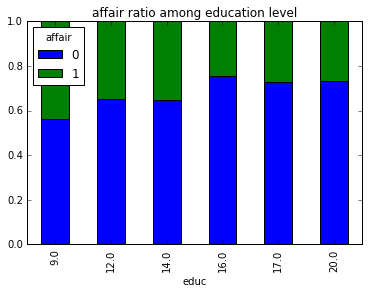

In [45]:
edu = pd.crosstab(dta.educ, dta.affair)
edu.div(edu.sum(1), axis=0).plot(kind='bar', stacked=True, title="affair ratio among education level")

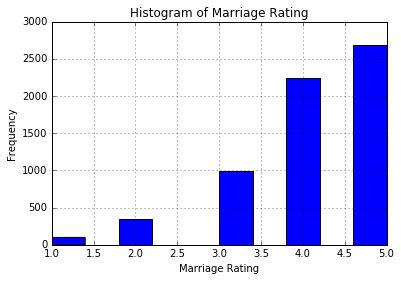

In [7]:
# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Let's take a look at the distribution of marriage ratings for those having affairs versus those not having affairs.

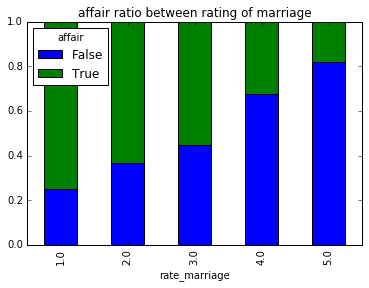

In [79]:
rate_aff = pd.crosstab(dta.rate_marriage, dta.affair.astype(bool))
rate_aff.div(rate_aff.sum(1), 0).plot(kind='bar', stacked=True, title="affair ratio between rating of marriage")

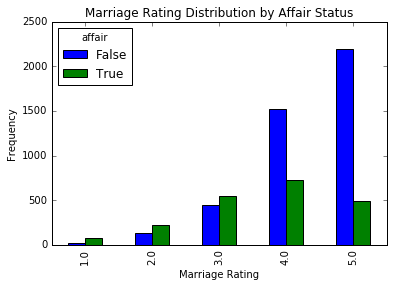

In [80]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Let's use a stacked barplot to look at the percentage of women having affairs by number of years of marriage.

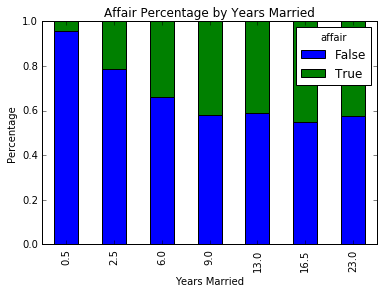

In [9]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

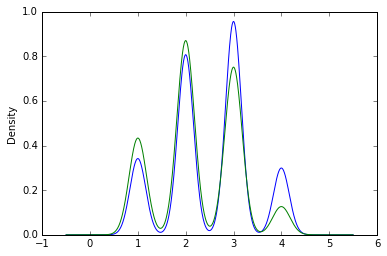

In [85]:
dta.loc[dta.affair == 0, "religious"].plot(kind="density")
dta.loc[dta.affair == 1, "religious"].plot(kind="density")

## Prepare Data for Logistic Regression

To prepare the data, I want to add an intercept column as well as dummy variables for `occupation` and `occupation_husb`, since I'm treating them as categorial variables. The dmatrices function from the [patsy module](http://patsy.readthedocs.org/en/latest/) can do that using formula language.

In [94]:
occ_dum = pd.get_dummies(dta.occupation.astype(int), prefix = 'occupation')
occ_hus = pd.get_dummies(dta.occupation_husb.astype(int), prefix= 'occp_hus')
df = pd.concat([dta, occ_dum, occ_hus], axis=1)
df.head()

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb   affairs  affair     ...      occupation_3  occupation_4  \
0              5.0  0.111111       1     ...               0.0           0.0   
1              4.0  3.230769       1     ...               1.0           0.0   
2              5.0  1.400000       1     ...               1.0           0.0   
3              5.0  0.727273       1     ...               0.0           0.0   
4              4.0  4.666666       1     ...               1.0           0.0   

   occupation_5  occupation_6  occp_hus_1  occp_hus_2  occp_hus_3  occp_hus_4  \
0           0.0           0.0         0.0         0.0         0.0         0.0   
1           0.0           0.0         0.0         0.0         0.0         1.0   
2           0.0           0.0         0.0         0.0         0.0         0.0   
3           1.0           0.0         0.0         0.0         0.0         0.0   
4           0.0           0.0         0.0         0.0         0.0         1.0   

   occp_hus_5  occp_hus_6  
0         1.0         0.0  
1         0.0         0.0  
2         1.0         0.0  
3         1.0         0.0  
4         0.0         0.0  

[5 rows x 22 columns]

## using patsy.dmatrices to extract data prepared for sklearn.

In [95]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


The column names for the dummy variables are ugly, so let's rename those.

In [97]:
y

affair
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
...      ...
6336     0.0
6337     0.0
6338     0.0
6339     0.0
6340     0.0
6341     0.0
6342     0.0
6343     0.0
6344     0.0
6345     0.0
6346     0.0
6347     0.0
6348     0.0
6349     0.0
6350     0.0
6351     0.0
6352     0.0
6353     0.0
6354     0.0
6355     0.0
6356     0.0
6357     0.0
6358     0.0
6359     0.0
6360     0.0
6361     0.0
6362     0.0
6363     0.0
6364     0.0
6365     0.0

[6366 rows x 1 columns]

In [96]:
X

Intercept  C(occupation)[T.2.0]  C(occupation)[T.3.0]  \
0           1.0                   1.0                   0.0   
1           1.0                   0.0                   1.0   
2           1.0                   0.0                   1.0   
3           1.0                   0.0                   0.0   
4           1.0                   0.0                   1.0   
5           1.0                   0.0                   1.0   
6           1.0                   0.0                   0.0   
7           1.0                   1.0                   0.0   
8           1.0                   0.0                   1.0   
9           1.0                   0.0                   1.0   
10          1.0                   0.0                   1.0   
11          1.0                   0.0                   1.0   
12          1.0                   1.0                   0.0   
13          1.0                   0.0                   1.0   
14          1.0                   0.0                   0.0   
15          1.0                   0.0                   1.0   
16          1.0                   0.0                   1.0   
17          1.0                   0.0                   0.0   
18          1.0                   0.0                   0.0   
19          1.0                   0.0                   0.0   
20          1.0                   0.0                   1.0   
21          1.0                   0.0                   1.0   
22          1.0                   0.0                   0.0   
23          1.0                   0.0                   1.0   
24          1.0                   0.0                   0.0   
25          1.0                   0.0                   0.0   
26          1.0                   1.0                   0.0   
27          1.0                   0.0                   1.0   
28          1.0                   0.0                   0.0   
29          1.0                   0.0                   1.0   
...         ...                   ...                   ...   
6336        1.0                   0.0                   0.0   
6337        1.0                   0.0                   0.0   
6338        1.0                   1.0                   0.0   
6339        1.0                   0.0                   0.0   
6340        1.0                   0.0                   0.0   
6341        1.0                   0.0                   0.0   
6342        1.0                   0.0                   0.0   
6343        1.0                   0.0                   1.0   
6344        1.0                   0.0                   1.0   
6345        1.0                   0.0                   1.0   
6346        1.0                   0.0                   0.0   
6347        1.0                   0.0                   1.0   
6348        1.0                   0.0                   0.0   
6349        1.0                   0.0                   0.0   
6350        1.0                   0.0                   1.0   
6351        1.0                   0.0                   1.0   
6352        1.0                   0.0                   1.0   
6353        1.0                   0.0                   1.0   
6354        1.0                   0.0                   1.0   
6355        1.0                   0.0                   1.0   
6356        1.0                   0.0                   1.0   
6357        1.0                   0.0                   0.0   
6358        1.0                   0.0                   1.0   
6359        1.0                   0.0                   0.0   
6360        1.0                   0.0                   1.0   
6361        1.0                   0.0                   0.0   
6362        1.0                   0.0                   0.0   
6363        1.0                   0.0                   1.0   
6364        1.0                   0.0                   1.0   
6365        1.0                   1.0                   0.0   

      C(occupation)[T.4.0]  C(occupation)[T.5.0]  C(occupation)[T.6.0]  \
0                      0.

In [98]:
# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [104]:
y.shape

(6366,)

We also need to flatten `y` into a 1-D array, so that scikit-learn will properly understand it as the response variable.

In [100]:
# flatten y into a 1-D array
y = np.ravel(y)

In [106]:
y.shape

(6366,)

## Logistic Regression

Let's go ahead and run logistic regression on the entire data set, and see how accurate it is!

In [142]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.72588752748978946

73% accuracy seems good, but what's the null error rate?

In [108]:
# what percentage had affairs?
y.mean()

0.32249450204209867

Only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting "no". So we're doing better than the null error rate, but not by much.

Let's examine the coefficients to see what we learn.

In [111]:
model.fit_intercept

True

In [113]:
X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [118]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

0                   1
0       Intercept      [1.4898836127]
1           occ_2    [0.188045429585]
2           occ_3    [0.498925834482]
3           occ_4    [0.250646830068]
4           occ_5    [0.838982866926]
5           occ_6    [0.833921309498]
6      occ_husb_2    [0.190546754371]
7      occ_husb_3    [0.297744586977]
8      occ_husb_4    [0.161319346627]
9      occ_husb_5    [0.187683057533]
10     occ_husb_6    [0.193916929917]
11  rate_marriage    [-0.70312369205]
12            age  [-0.0584174365152]
13    yrs_married    [0.105676659231]
14       children   [0.0169190752198]
15      religious   [-0.371136216999]
16           educ   [0.0040167292239]

Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. For both the wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to the baseline occupation (student), since all of the dummy coefficients are positive.

## Model Evaluation Using a Validation Set

So far, we have trained and tested on the same set. Let's instead split the data into a training set and a testing set.

In [120]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We now need to predict class labels for the test set. We will also generate the class probabilities, just to take a look.

In [121]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)

[ 1.  0.  0. ...,  0.  0.  0.]


In [122]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print(probs)

[[ 0.35142568  0.64857432]
 [ 0.9095253   0.0904747 ]
 [ 0.72576657  0.27423343]
 ..., 
 [ 0.55736953  0.44263047]
 [ 0.81213863  0.18786137]
 [ 0.74729568  0.25270432]]


As you can see, the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

Now let's generate some evaluation metrics.

In [123]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.729842931937
0.74596198609


In [128]:
metrics.confusion_matrix(y_test, predicted)

array([[1169,  134],
       [ 382,  225]])

In [129]:
metrics.f1_score(y_test, predicted)

0.46583850931677018

The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.

We can also see the confusion matrix and a classification report with other metrics.

In [131]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1169  134]
 [ 382  225]]
             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



In [141]:
from sklearn.cross_validation import cross_val_score
model2 = LogisticRegression()
score = cross_val_score(estimator = model2, X=X, y=y, cv=10)
score.mean()

0.7241630685514876

## Model Evaluation Using Cross-Validation

Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [139]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[ 0.72100313  0.70219436  0.73824451  0.70597484  0.70597484  0.72955975
  0.7327044   0.70440252  0.75157233  0.75      ]
0.724163068551


Looks good. It's still performing at 73% accuracy.

## Predicting the Probability of an Affair

Just for fun, let's predict the probability of an affair for a random woman not present in the dataset. She's a 25-year-old teacher who graduated college, has been married for 3 years, has 1 child, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer.

In [143]:
model.predict_proba(np.array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,
                              16]))

/Users/jianglongli/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.77472292,  0.22527708]])

The predicted probability of an affair is 23%.

## Next Steps

There are many different steps that could be tried in order to improve the model:

* including interaction terms
* removing features
* regularization techniques
* using a non-linear model